In [1]:
pwd

'/home/dev/Documents/ML/Linear Regression'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("House_Price.csv", header=0)

In [5]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
#filling missing values with mean
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [8]:
df = df.fillna(df.mean()) #for all column simuntaneously but not preferred

In [9]:
df.crime_rate = np.log(1+df.crime_rate)

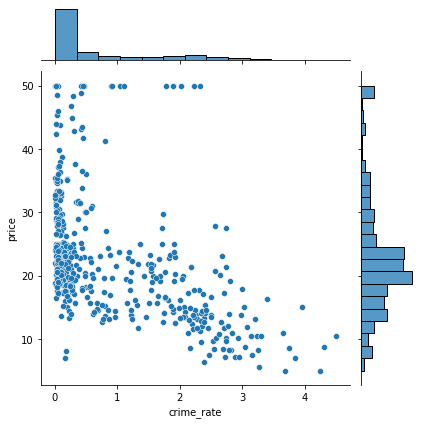

In [10]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [11]:
df["avg_dist"] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [12]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [13]:
df = pd.get_dummies(df)

In [14]:
del df["airport_NO"]

In [15]:
del df["waterbody_None"]

In [16]:
del df['parks']

In [17]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,4.0875,1,0,0,1,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,4.9675,0,1,0,0,1
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,4.9675,0,0,0,0,1
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,6.0650,1,1,0,0,1
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,6.0625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,2.4775,0,0,1,0,1
502,20.6,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,2.2875,1,0,1,0,1
503,23.9,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,2.1675,0,0,0,0,1
504,22.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,2.3900,1,0,0,0,1


In [18]:
import statsmodels.api as sn

In [19]:
X = sn.add_constant(df['room_num'])

In [20]:
lm = sn.OLS(df['price'],X).fit()

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.31e-74
Time:                        00:39:06   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
import numpy as np

In [24]:
y = df['price']

In [25]:
X = df[['room_num']] #Should be two dimensional array

In [26]:
lm2 = LinearRegression()

In [27]:
lm2.fit(X,y)

LinearRegression()

In [28]:
print(lm2.intercept_, lm2.coef_)

-34.65924312309721 [9.09966966]


In [29]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [30]:
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [31]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

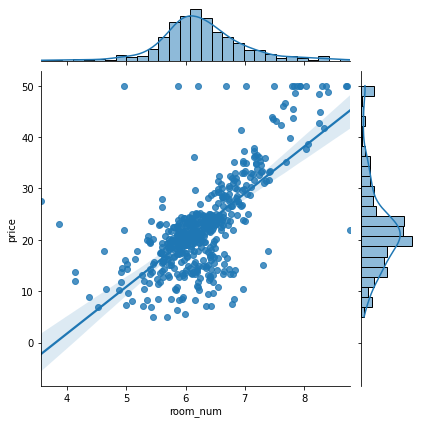

In [32]:
sns.jointplot(x= df['room_num'], y=df['price'], data=df, kind="reg")